## Naive Bayes Record Data

Within this tab I will provide my code, explanation and analysis for my naive bayes gaussian machine learning model. I ultimately decided to add a seventh variable to my dataset. This variable is the percentage of policy in a country in a specific year specifically relating to ocean sustainability. I had to clean and tidy this data. You can find this cleaning under the cleaning tab.

This model aims to explore whether specific variables are good indicators of the extent to which policies relate to the ocean. It can help identify which aspects or attributes of policies are more strongly correlated with ocean-related policies and which are not. If the model performs well, the findings could have the ability inform data-driven decision-making in policy development specifically with regard to ocean sustainability and conservation efforts.

The analysis has the ability to uncover trends or patterns in policy data that can be used for policy assessment, trend analysis, and making informed recommendations.

## Initial Gaussian Naive Bayes 

### Prepping Data for Model

Within this code chunk, the necessary libraries are installed, the data is imported, all columns are set to integers and the country columns is encoded in order for the model to run correctly. 


In [32]:
#| code-fold: true
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Loading Merged Data
nb_record = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")

# Encode the "Country" column using LabelEncoder
label_encoder = LabelEncoder()
nb_record['Country'] = label_encoder.fit_transform(nb_record['Country'])

### Splitting Data into Feature and Target Variables

**Features** - Marine Protected Area, Inventions, Instruments, Aquaculture Production and Fishing Exports

**Target** - Percentage of Policy out of all policy in a year relating to ocean sustainability. I binned these values into five bins. These bins are 0-17, 18-36, 37-54, 55 - 72, 73 - 87. 

I did this to help simplify and interpret my model. For example, if a country in a specific year has only 5% of all their policy relating to ocean sustainability then the value will be put in bin 0.

The code below splits the data into feature and target variables as well as splits the data into training, testing and validation sets. I have commented on the code to display what each line does as well.

In [33]:
#| code-fold: true
#Creating bins for target - 5 different bins
y = nb_record['Value']
bin_edges = [0, 18, 36, 54, 72, 87]
y_binned = pd.cut(y, bins=bin_edges, labels=False, include_lowest=True)

# X is all features besides Value
X = nb_record.drop(['Value'], axis=1)

# Split the data into training and the remaining data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Split the remaining data into testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.3, random_state=42)

### Creating a Gaussian Naive Bayes Classifier 

As stated earlier I am using a gaussian naive bayes classifer to complete this model. I have access to this from the library sklearn.naive_bayes.

In [34]:
#| code-fold: true
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Training classifier using training data 
gnb.fit(X_train, y_train)

GaussianNB()

### Making Predictions and Evaluating Performance

Some helpful definitions to know when viewing this part of the modeling process are:

**Accuracy:** A performance metric used to evaluate the accuracy of a machine learning model on a test dataset

**Precision:** Precision = True Positives (TP) / (False Positives (FP) + True Positives (TP))

**Recall:** Recall = True Positives (TP) / (False Negatives (FN) + True Positives (TP))

**F1:** Combines precision and recall. F1 = 2 × (Precision+Recall) / (Precision×Recall)

In [35]:
#| code-fold: true
# Predictions on the training set / Model's performance on the training set / Classification Report
y_train_pred = gnb.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", accuracy_train)
classification_report_train = classification_report(y_train, y_train_pred)
print("Training Classification Report:\n", classification_report_train)

# Predictions on the testing set / Models performance on testing set / Classification Report
y_test_pred = gnb.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", accuracy_test)
classification_report_test = classification_report(y_test, y_test_pred)
print("Testing Classification Report:\n", classification_report_test)

Training Accuracy: 0.5207756232686981
Training Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.43      0.60       290
           1       0.21      0.79      0.33        24
           2       0.11      0.83      0.20        12
           3       0.50      0.86      0.63         7
           4       0.72      1.00      0.84        28

    accuracy                           0.52       361
   macro avg       0.50      0.78      0.52       361
weighted avg       0.86      0.52      0.58       361

Testing Accuracy: 0.4351851851851852
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.37      0.53        84
           1       0.27      0.54      0.36        13
           2       0.03      1.00      0.07         1
           3       0.44      0.67      0.53         6
           4       0.36      1.00      0.53         4

    accuracy                           0.44  

In [36]:
#| code-fold: true
# Predictions on the validation set /  Model's performance on the validation set / Classificiation Report
y_val_pred = gnb.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)
classification_report_val = classification_report(y_val, y_val_pred)
print("Validation Classification Report:\n", classification_report_val)

Validation Accuracy: 0.6170212765957447
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.59      0.75        37
           1       0.40      0.57      0.47         7
           2       0.11      1.00      0.20         1
           3       0.00      0.00      0.00         0
           4       0.40      1.00      0.57         2

    accuracy                           0.62        47
   macro avg       0.38      0.63      0.40        47
weighted avg       0.87      0.62      0.69        47



/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


What do these numbers mean?

The training accuracy is 52%, the testing accuracy is 43% and the validation accuracy is 61%. This means that there is room for improvement that can be done through feature selection. 

Another number to pay attention to is the F1 score which combines precision and recall. The F1 weighted average for the training set is 58, 51 for the testing set and 69 for the validation set. 


## Feature Selection

Knowing that our accuracy is not as high as we would prefer, we can resort to feature selection!

The primary objective of feature selection is identifying and choosing the most relevant features from the data set for the given task. I used feature selection to improove the overall accuracy of my Naive Bayes model. Feature selection returns a subset of original features. You can learn more about feature selection under the feature selection menu.

## Gaussian Naive Bayes Classifier (Feature Selected Data)

In an attempt to figure out what features improove accuracy, I manually tested numerous combinations of features as X. I ended up figuring out that dropping Aquaculture Production and Fishing Exports improove the accuracy of this model. 

Within the code below, you will notice that I have done the exact same process as above but dropped two features. You will see that the accuracy increases! 

Note* I did not include in depth comments on this process again as you can see them above. 

In [45]:
#| code-fold: true
from sklearn.metrics import f1_score
y = nb_record['Value']
bin_edges = [0, 18, 36, 54, 72, 87]
y_binned = pd.cut(y, bins=bin_edges, labels=False, include_lowest=True)
X = nb_record.drop(['Value', 'Aqua Production (Millions)', 'Fishing Exports (Millions)'], axis=1)

X_train, X_remaining, y_train, y_remaining = train_test_split(X, y_binned, test_size=0.3, random_state=42) #train_test_split function from the scikit-learn library to split your data into training and remaining sets for classification
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate the model's performance on the training set
y_train_pred = gnb.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", accuracy_train)

# Predictions on the testing set / Calculate the accuracy for the test set

y_test_pred = gnb.predict(X_test)
accuracy_test_fs = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", accuracy_test_fs)

# Predictions on the validation set
y_val_pred = gnb.predict(X_val)

# Calculate the accuracy for the validation set
accuracy_val_fs = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val_fs)

f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')

print("Training F1 Score:", f1_train)
print("Testing F1 Score:", f1_test)
print("Validation F1 Score:", f1_val)


Training Accuracy: 0.7811634349030471
Testing Accuracy: 0.7037037037037037
Validation Accuracy: 0.7872340425531915
Training F1 Score: 0.8307245987070051
Testing F1 Score: 0.750756989719462
Validation F1 Score: 0.8058261232337525


As displayed, the accuracy and F1 score for training, testing and validation ALL increased. This is a direct result of getting rid of two features. 

### Confusion Matrix

Confusion matrices provide a clear summary of how well the model has performed in terms of classifying data into different categories. The categories that our model is trying to classify the data into is the five different bins. 

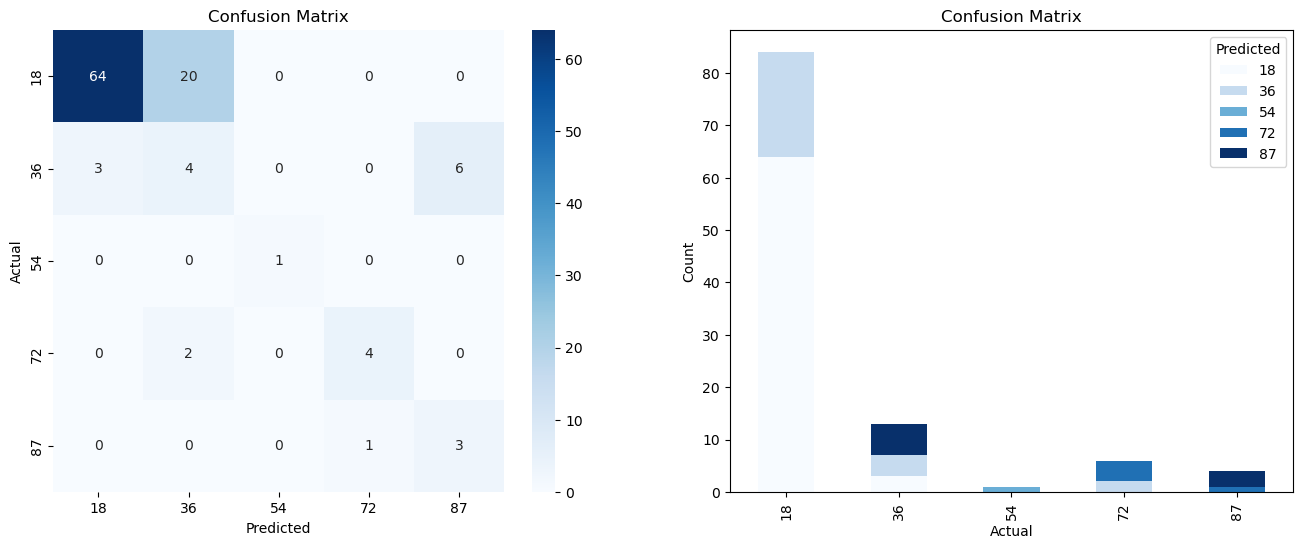

In [46]:
#| code-fold: true
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_test_pred)
confusion_df = pd.DataFrame(conf_matrix, index=bin_edges[1:], columns=bin_edges[1:])
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=bin_edges[1:], yticklabels=bin_edges[1:], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')
confusion_df.plot(kind='bar', stacked=True, cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Count')
axes[1].set_title('Confusion Matrix')
axes[1].legend(title='Predicted', labels=bin_edges[1:])


This confusion matrix on the left shows us which bins were predicted correctly (dark blue). As you can see, the bin predicted most accurately was bin 0 - which is 0-18% of policy relates to ocean sustainability. This is most likely a result of the dataset having the largest number of bin 0's.

Additionally, on the bar plot on the right. The bar represents the actual classes and the segments of each bar show the predicted classes. This bar chart allows you to see the distribution of predicted classes for each actual class. The color intensity indicates the count of predictions.

### Bar Plots for Accuracy and F1 Scores

I created bar charts to show the accuracy and f1 scores for the training, testing and validation sets. This can be utilized to easily see the differences in these scores. 

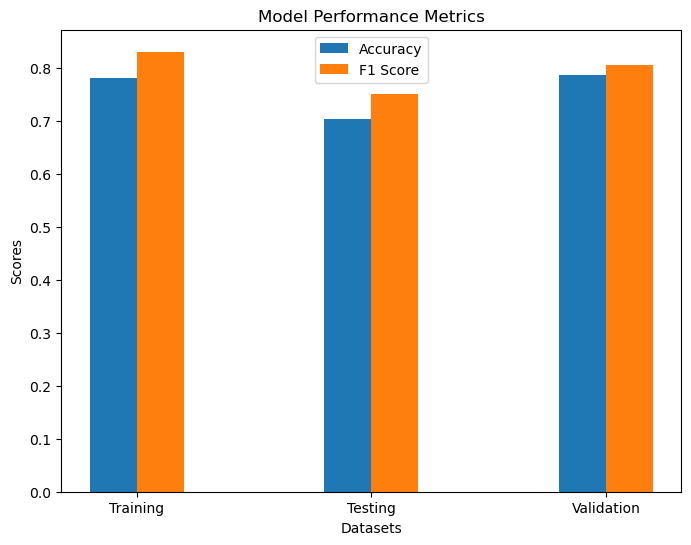

In [49]:
import matplotlib.pyplot as plt
datasets = ['Training', 'Testing', 'Validation']
accuracies = [accuracy_train, accuracy_test_fs, accuracy_val_fs]
f1_scores = [f1_train, f1_test, f1_val]
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2
x = range(len(datasets))
ax.bar(x, accuracies, width, label='Accuracy', align='center')
ax.bar([i + width for i in x], f1_scores, width, label='F1 Score', align='center')
ax.set_xlabel('Datasets')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(datasets)
ax.legend()


## Further Analysis on Naive Bayes

**Describe how the trained model is tested on the testing dataset.**

Within this tab it can be understood that the trained model is tested on the testing set. This is the basis of machine learning. We want to train the model first before it is actually implemented onto the testing dataset. 

**What is overfitting and underfitting**

Underfitting is when the model does not fit the data well and is too simple to capture the patterns in the data. This model is underfitting our data. 

Overfitting is when the model fits the data too well. It is crucial to avoid overfitting because an overfit model will not work well on new data. 

**Does the model do a good job of predicting test data?**

As shown by the testing accuracy of 70%, we can infer that the model does an alright job predicting test data. It could be better. 

## Conclusions

Overall, this tab walks readers through a naive bayes classification example. This example works specifically with the features Marine Protected Area, Inventions, Instruments, Aquaculture Production and Fishing Exports. The target is the percentage of policy out of all policy in a year relating to ocean sustainability. This model has 70% accuracy. 

So how can this model helps us? 

- **Pattern Extrapolation** This model can learn patterns from the provided features related to ocean sustainability policy. We can use the model to make predictions or classifications for other countries, even if we have limited feature data. For instance, if we wanted to we could estimate or understand the likelihood of ocean sustainability policy adoption in countries for which we don't have extensive data.

- **Feature Impact** This model can help researchers understand what features have had an impact on ocean policy in the past. By analyzing feature importance, researchers can focus on what other countries have done in these areas to promote more effective ocean policy. This can inform strategies and recommendations for improving sustainability.

- **Policy Decisions**  This model can provide insights into which features have influenced policy decisions in different countries. This information can be used to make data-driven decisions regarding the implementation of policies related to ocean sustainability.

- **Committment** This model shows which countries are committed to policy and the features that have impacted this commitment. This information can be valuable for international cooperation and sharing best practices.

